In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

plt.style.use('seaborn')

In [98]:
try:
    data = pd.read_csv('data/test.acdc.dat', header=None, sep='\s+')
except FileNotFoundError:
    print('No file')


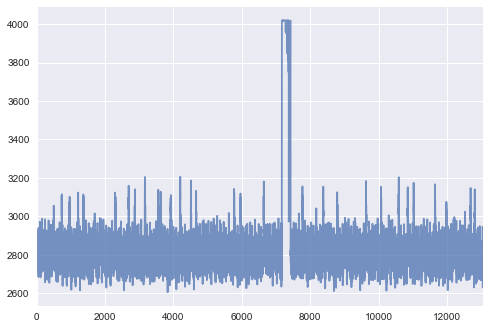

In [99]:
data[3].plot(alpha=.75)

In [4]:
def discriminate_events(channel, start=0, width=256, save=False):
    chan = pd.DataFrame()
    for i in range(50):
        chan[i] = channel.loc[
            (start + i*width):((i+1)*width - 1 + start)
        ].get_values()
    
    if save:
        directory = 'event_data/'
        if not os.path.exists(directory):
            os.makedirs(directory)
#         print('{}{}'.format(directory,channel.name))
        chan.to_csv('{}{}.csv'.format(directory,channel.name))
    return chan

In [5]:
def plot_events(channel):
    directory = 'figs/'+channel.name
    if not os.path.exists(directory):
        os.makedirs(directory)
    for event in channel:
        fig = plt.figure()
        plt.plot(channel[event])
        plt.xlabel('Time Axis')
        plt.ylabel('ADC Counts')
        plt.title('Event: '+ str(event+1))
        plt.savefig('{}/event_{}'.format(directory, str(event+1)))
        plt.close()

In [100]:
chan = data[3]
chan.name='3000-3250'
ch2 = discriminate_events(chan)
ch2.name = chan.name
# plot_events(ch2)

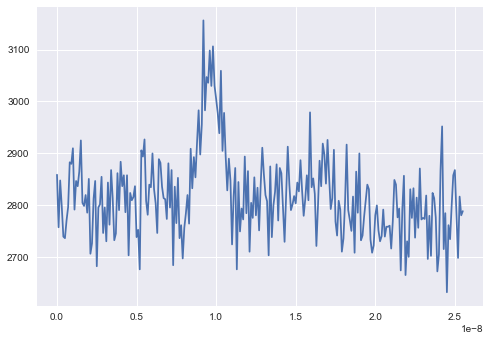

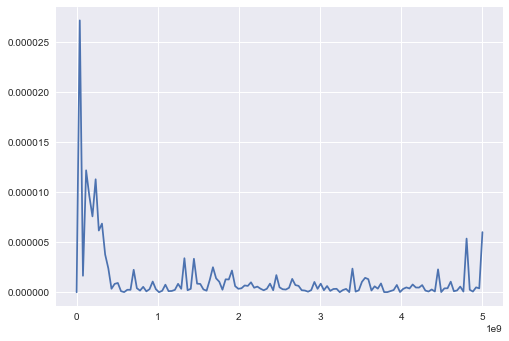

In [181]:
from scipy import signal
sig = ch2[30]
sig.index= np.asarray(ch2.index)*1e-10

fs = 1/(1e-10)

plt.plot(sig, alpha=None)

f, P = signal.periodogram(sig, fs)
plt.figure()
plt.plot(f, P)

(2.5e-09, 1.75e-08)

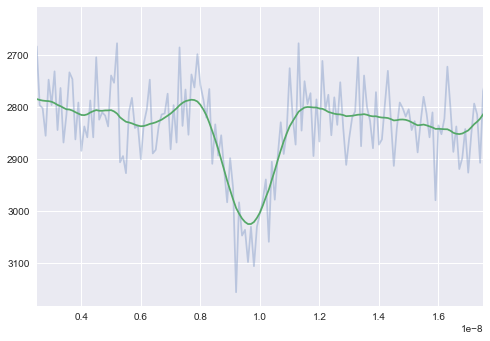

In [207]:
from scipy.signal import butter, lfilter, filtfilt,  medfilt, wiener

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    y = lfilter(b, a, data)
    return y


plt.plot(sig, alpha=0.3)
plt.plot(sig.index, filtfilt([1/10]*10, 1.0, sig))
# plt.plot(sig.index, medfilt(sig))
# plt.plot(sig.index, wiener(sig))
plt.gca().invert_yaxis()
# plt.ylim(3200, 2700)
plt.xlim(0.25e-8, 1.75e-8)
    